## Test Case 1

Question 1: Predictive Model - Housing Price Prediction

Problem Statement:

You are given a dataset containing information about houses, including various features like square footage, number of bedrooms, location, and year built. Your task is to build a predictive model that estimates the sale price of a house based on these features.

Input:

1. features: A list of lists where each sublist contains the features of a house. The features are [square_footage, bedrooms, bathrooms, location, year_built].


2. prices: A list of integers where each element represents the sale price of a house corresponding to the features in the features list.


3. new_house: A list of integers representing the features of a new house for which you need to predict the sale price.

Output:

	•	A float representing the predicted sale price of the new house.

In [804]:
features1 = [[2000, 3, 2, 'urban', 2010], [1500, 2, 1, 'suburban', 2005], [2500, 4, 3, 'urban', 2020]]
prices1 = [400000, 250000, 500000]
new_house1 = [1800, 3, 2, 'suburban', 2015]

In [806]:
features2 = [[1000, 1, 1, 'rural', 1990], [1200, 2, 1, 'suburban', 2000], [1300, 2, 2, 'urban', 2010]]
prices2 = [150000, 180000, 230000]
new_house2 = [1100, 1, 1, 'urban', 2005]

## Solution 1

In [285]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [287]:
mappings = {'urban': 1, 'suburban': 0, 'rural' : -1}

def engineering(features):
    features = pd.DataFrame(features)
    features[3] = features[3].map(mappings)
    return features

def newHouse(new_house):
    new_house = pd.DataFrame(new_house).T
    new_house[3] = new_house[3].map(mappings)
    return new_house
    

In [289]:
features1 = engineering(features1)
features2 = engineering(features2)

model1 = RandomForestRegressor()
model2 = LinearRegression()

In [291]:
model1.fit(features1, prices1)
model2.fit(features2, prices2)

LinearRegression()

In [293]:
new_house1 = newHouse(new_house1)
new_house2 = newHouse(new_house2)

print(f'Expected Price for New House 1: {int(model1.predict(new_house1)[0])}')
print(f'Expected Price for New House 1: {int(model2.predict(new_house2)[0])}')

Expected Price for New House 1: 355000
Expected Price for New House 1: 232354


## Test Case 2

Question 2: Feature Engineering - Text Data Processing

Problem Statement:

You have a dataset of product reviews from an e-commerce website. Each review is associated with a rating (1 to 5 stars) and a text description. Your task is to engineer a feature that captures the sentiment of the review based on the text.

Input:

1. reviews: A list of dictionaries where each dictionary has two keys: text and rating. The text is a string containing the review text, and the rating is an integer between 1 and 5.

2. new_review: A string representing the text of a new review.

Output:

	•	An integer between 1 and 5 representing the predicted sentiment of the new_review.

In [311]:
reviews = [
    {'text': 'Amazing product, highly recommend!', 'rating': 5},
    {'text': 'Not what I expected, very disappointed', 'rating': 1},
    {'text': 'Average quality, decent for the price', 'rating': 3},
    {'text': 'Excellent product, will buy again!', 'rating': 5},
    {'text': 'Terrible quality, broke after one use', 'rating': 1},
    {'text': 'Good value for money, satisfied', 'rating': 4},
    {'text': 'Mediocre product, nothing special', 'rating': 3},
    {'text': 'High quality and great service, very happy', 'rating': 5},
    {'text': 'The product was okay, but shipping was slow', 'rating': 3},
    {'text': 'Fantastic, exceeded my expectations!', 'rating': 5},
    {'text': 'Poor construction, would not recommend', 'rating': 2},
    {'text': 'Just what I needed, perfect!', 'rating': 5},
    {'text': 'Didn’t work as advertised, very frustrated', 'rating': 1},
    {'text': 'Quite good, but has some minor flaws', 'rating': 4},
    {'text': 'Awful experience, customer service was no help', 'rating': 1},
    {'text': 'Product works well, but a bit overpriced', 'rating': 3},
    {'text': 'Exceeded my expectations, very pleased', 'rating': 5},
    {'text': 'Not worth the money, cheap materials', 'rating': 2},
    {'text': 'Solid product, reliable and durable', 'rating': 4},
    {'text': 'Decent product, but nothing to write home about', 'rating': 3},
    {'text': 'Absolutely love this product, best purchase ever!', 'rating': 5},
    {'text': 'Very poor quality, do not recommend', 'rating': 1},
    {'text': 'Good product, arrived on time and works as expected', 'rating': 4},
    {'text': 'Just okay, nothing special, but it works', 'rating': 3},
    {'text': 'Fantastic quality, worth every penny', 'rating': 5},
    {'text': 'Cheaply made, fell apart after a week', 'rating': 1},
    {'text': 'Product is fine, but the color was different than expected', 'rating': 3},
    {'text': 'Great product, great price, very happy', 'rating': 5},
    {'text': 'Disappointing, expected much better', 'rating': 2},
    {'text': 'Works as advertised, no complaints', 'rating': 4},
    {'text': 'Nothing special, but does the job', 'rating': 3},
    {'text': 'Very satisfied, will buy again', 'rating': 5},
    {'text': 'Poorly made, doesn’t work as it should', 'rating': 1},
    {'text': 'Good product, but a bit expensive', 'rating': 4},
    {'text': 'Average quality, not impressed', 'rating': 3},
    {'text': 'Top-notch product, highly recommend', 'rating': 5},
    {'text': 'Terrible, would not buy again', 'rating': 1},
    {'text': 'Pretty good, but has some minor issues', 'rating': 4},
    {'text': 'Did not meet my expectations, low quality', 'rating': 2},
    {'text': 'Great value, great product, highly satisfied', 'rating': 5},
    {'text': 'Decent product, but overpriced', 'rating': 3},
    {'text': 'Fantastic, love it!', 'rating': 5},
    {'text': 'Terrible, complete waste of money', 'rating': 1},
    {'text': 'Good quality, but took a long time to arrive', 'rating': 4},
    {'text': 'Not bad, but could be better', 'rating': 3},
    {'text': 'Amazing, works perfectly!', 'rating': 5},
    {'text': 'Disappointed, broke after a few uses', 'rating': 2},
    {'text': 'Quality is okay, but expected more', 'rating': 3},
    {'text': 'Love this product, will definitely buy again', 'rating': 5},
    {'text': 'Waste of money, very low quality', 'rating': 1},
    {'text': 'Satisfied with the purchase, works as described', 'rating': 4},
    {'text': 'Nothing impressive, just average', 'rating': 3},
    {'text': 'Outstanding product, exceeded my expectations', 'rating': 5},
    {'text': 'Not worth the price, very cheap materials', 'rating': 2},
    {'text': 'Great product, but the instructions were confusing', 'rating': 4},
    {'text': 'Just fine, does the job but nothing more', 'rating': 3},
    {'text': 'Absolutely fantastic, highly recommend', 'rating': 5},
    {'text': 'Very disappointing, low quality', 'rating': 1},
    {'text': 'Good product, but a bit too expensive', 'rating': 4},
    {'text': 'Average at best, not very impressed', 'rating': 3},
    {'text': 'Highly recommend, excellent product', 'rating': 5},
    {'text': 'Would not buy again, very cheaply made', 'rating': 1},
    {'text': 'Solid product, works well', 'rating': 4},
    {'text': 'Nothing special, just an okay product', 'rating': 3},
    {'text': 'Great product, definitely recommend', 'rating': 5},
    {'text': 'Terrible experience, will not purchase again', 'rating': 1},
    {'text': 'Good value, decent product', 'rating': 4},
    {'text': 'Mediocre at best, expected better', 'rating': 2},
    {'text': 'Fantastic product, will buy again!', 'rating': 5},
    {'text': 'Cheap and flimsy, do not recommend', 'rating': 1},
    {'text': 'Great product, but a little pricey', 'rating': 4},
    {'text': 'Not bad, but could be improved', 'rating': 3},
    {'text': 'Exceptional quality, very satisfied', 'rating': 5},
    {'text': 'Low quality, not worth the price', 'rating': 2},
    {'text': 'Product is good, but shipping took too long', 'rating': 3},
    {'text': 'Highly satisfied, great product', 'rating': 5},
    {'text': 'Disappointing quality, not worth the money', 'rating': 2},
    {'text': 'Pretty good product, would recommend', 'rating': 4},
    {'text': 'Just average, nothing special', 'rating': 3},
    {'text': 'Outstanding quality, very happy', 'rating': 5},
    {'text': 'Very poor quality, don’t waste your money', 'rating': 1},
    {'text': 'Good product, but a bit too expensive for what it is', 'rating': 4},
    {'text': 'Average product, expected more', 'rating': 3},
    {'text': 'Excellent product, very satisfied', 'rating': 5},
    {'text': 'Terrible, fell apart immediately', 'rating': 1},
    {'text': 'Solid product, good value', 'rating': 4},
    {'text': 'Okay product, but could be improved', 'rating': 3},
    {'text': 'Love it, works perfectly', 'rating': 5},
    {'text': 'Awful, would not recommend', 'rating': 1}
]
new_review = 'This product is just okay, nothing special.'

## Solution 2

In [316]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def predict_review_sentiment(reviews, new_review):
    
    texts = [review['text'] for review in reviews]
    ratings = [review['rating'] for review in reviews]
    
    X_train, y_train = texts, ratings
    model = Pipeline([
        ('tfidf', TfidfVectorizer()), # Tfidf Vectorizer used, in addition you may use bag of words or word embeddings like Word2Vec or BERT
        ('model', RandomForestClassifier()) # You may use a model of your choice, in this case we used a random forest classifier.
    ])
    model.fit(X_train, y_train)
    predicted_rating = model.predict([new_review])[0]
    predicted_rating = round(predicted_rating)
    predicted_rating = max(1, min(5, predicted_rating))  
    return predicted_rating

new_review1 = 'This product was okay, nothing special.'
new_review2 = 'This was a very bad product and I would not recommend it to anyone.'
new_review3 = 'This product is incredible!'

predicted_rating1 = predict_review_sentiment(reviews, new_review1)
predicted_rating2 = predict_review_sentiment(reviews, new_review2)
predicted_rating3 = predict_review_sentiment(reviews, new_review3)

print(new_review1, f'Predicted Rating: {predicted_rating1}')
print(new_review2, f'Predicted Rating: {predicted_rating2}')
print(new_review3, f'Predicted Rating: {predicted_rating3 }')

This product was okay, nothing special. Predicted Rating: 3
This was a very bad product and I would not recommend it to anyone. Predicted Rating: 1
This product is incredible! Predicted Rating: 5


## Test Case 3

Question 3: Data Cleaning - Missing Values Handling

Problem Statement:

You have a dataset with missing values in several columns. Your task is to clean the data by imputing the missing values based on the median of the respective column. If a column has all missing values, it should be dropped from the dataset.

Input:

	•	data: A pandas DataFrame where each column represents a feature and each row represents a data point.
 
Output:

	•	A cleaned pandas DataFrame with missing values imputed or columns dropped if necessary.

In [424]:
data1 = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, np.nan, np.nan, np.nan],
    'C': [5, 6, 7, np.nan]
})

data2 = pd.DataFrame({
    'X': [10, 15, np.nan, 20],
    'Y': [np.nan, 25, 30, np.nan],
    'Z': [np.nan, np.nan, np.nan, np.nan]
})

## Solution 3

In [435]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


data1 = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, np.nan, np.nan, np.nan],
    'C': [5, 6, 7, np.nan]
})

data2 = pd.DataFrame({
    'X': [10, 15, np.nan, 20],
    'Y': [np.nan, 25, 30, np.nan],
    'Z': [np.nan, np.nan, np.nan, np.nan]
})

print(data1) 
print(data2)

data1 = data1.drop('B', axis=1)
data2 = data2.drop('Z', axis=1)

cleaning_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cleaned_data1 = pd.DataFrame(cleaning_pipeline.fit_transform(data1), columns=data1.columns)
cleaned_data2 = pd.DataFrame(cleaning_pipeline.fit_transform(data2), columns=data1.columns)

print(cleaned_data1)
print(cleaned_data2)

     A   B    C
0  1.0 NaN  5.0
1  2.0 NaN  6.0
2  NaN NaN  7.0
3  4.0 NaN  NaN
      X     Y   Z
0  10.0   NaN NaN
1  15.0  25.0 NaN
2   NaN  30.0 NaN
3  20.0   NaN NaN
     A    C
0  1.0  5.0
1  2.0  6.0
2  2.0  7.0
3  4.0  6.0
      A     C
0  10.0  27.5
1  15.0  25.0
2  15.0  30.0
3  20.0  27.5


## Test Case 4

Problem Statement:

You are provided with a dataset containing daily sales data for a retail store. Your task is to forecast the sales for the next n days based on the given historical data.

Input:

	•	sales: A list of integers where each element represents the sales on a particular day.

 
	•	n: An integer representing the number of days to forecast.

Output:

	•	A list of integers representing the forecasted sales for the next n days.

In [909]:
sales1 = [200, 220, 250, 240, 230, 220, 210, 216, 285, 376]
n1 = 3

sales2 = [300, 320, 310, 330, 340, 350, 360]
n2 = 5


array([102.60182359, 104.09046162, 103.05174055, ..., 851.59202955,
       879.90383804, 873.90686959])

## Solution 4

In [880]:
from sklearn.linear_model import LinearRegression


def future_predictions(sales, n):
    X = np.arange(len(sales)).reshape(-1,1)
    y = np.array(sales)
    
    model = LinearRegression()
    model.fit(X, y)
    for i in range(n):
        print(f'The sales will be {model.predict(np.array(len(sales) + i - 1).reshape(-1, 1)).round(2)} after {i + 1} days')
    return

In [882]:
future_predictions(sales1, n1)

The sales will be [292.95] after 1 days
The sales will be [303.67] after 2 days
The sales will be [314.39] after 3 days


In [884]:
future_predictions(sales2, n2)

The sales will be [358.93] after 1 days
The sales will be [368.57] after 2 days
The sales will be [378.21] after 3 days
The sales will be [387.86] after 4 days
The sales will be [397.5] after 5 days


## Test Case 5

Problem Statement:

You are provided with a dataset containing daily stock data. Your task is to forecast the stock for the next n days based on the given historical data.

Input:

•	generate_stock_prices: A function to return a list of integers where each element represents the stock price on a particular day.


•	n: An integer representing the number of days to forecast.
Output:

•	A list of integers representing the forecasted stock price for the next n days.

In [ ]:
def generate_stock_prices(initial_price=100, days=365, mu=0.001, sigma=0.02):
    daily_returns = np.random.normal(loc=mu, scale=sigma, size=days)
    price_array = initial_price * np.exp(np.cumsum(daily_returns))
    return price_array


days = 365 * 5
initial_price = 100
stock_prices = generate_stock_prices(initial_price=initial_price, days=days)
stock_prices

## Solution 5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


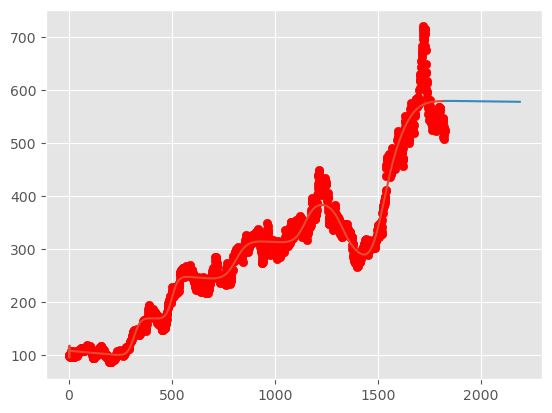

In [971]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor


days = np.array([x for x in range(len(data))]).reshape(-1,1)

#model = LinearRegression()
#model = Lasso(alpha=10)
#model = Ridge(alpha=1)
model = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='lbfgs', max_iter=5000)

model.fit(days, data)

prediction = model.predict(days)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(x=days, y=data, color='red')
plt.plot(days, prediction)
plt.plot(np.array([days[-1] + x for x in range(365)]).reshape(-1,1), model.predict(np.array([days[-1] + x for x in range(365)]).reshape(-1,1)))

## Test Case 6

Problem Statement:
You are given a dataset containing information about sales transactions. The dataset includes the following columns:

	•	TransactionID: A unique identifier for each transaction.
	•	CustomerID: The ID of the customer making the transaction.
	•	TransactionDate: The date of the transaction.
	•	Amount: The amount of the transaction.

Write a Python function that calculates the total amount spent by each customer and returns the top 3 customers who have spent the most. The function should return a list of tuples in the format (CustomerID, TotalAmount).

In [1027]:
transactions = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4, 5],
    'CustomerID': [101, 102, 101, 103, 101],
    'TransactionDate': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Amount': [100, 200, 150, 50, 250]
})

# Expected output: [(101, 500), (102, 200), (103, 50)]

## Solution 6

In [1060]:
def solution(transactions):
    top_customers = pd.DataFrame(transactions.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False)).head(3)
    return list(zip(top_customers.index, top_customers.values))#

print(solution(transactions))

[(101, array([500])), (102, array([200])), (103, array([50]))]


## Test Case 7

Problem Statement:

You have built a linear regression model to predict house prices based on various features. After training the model, you want to evaluate its performance. The evaluation metric you’re interested in is the Mean Absolute Error (MAE).

Write a Python function that calculates the MAE given the true values and the predicted values.

In [1066]:
true_values = [200000, 150000, 300000, 250000]
predicted_values = [210000, 140000, 310000, 240000]

## Solution 7

In [1096]:
# numpy solution :::: calculations can be made in parallel
def mean_absolute_error(predicted_values, true_values):
    if len(true_values) != len(predicted_values):
        return 'Mismatched Input Sizes'

    true_values, predicted_values = np.array(true_values), np.array(predicted_values)
    return (np.abs(true_values - predicted_values).sum()) / len(true_values)

mean_absolute_error(predicted_values, true_values)

10000.0

## Test Case 8

Problem Statement:
You are analyzing the performance of two marketing campaigns. You have the following data:

	•	CampaignA_Conversions: The number of conversions for Campaign A.
	•	CampaignB_Conversions: The number of conversions for Campaign B.

Write a Python function that conducts a hypothesis test to determine if there is a significant difference between the conversion rates of the two campaigns. Use a significance level of 0.05. The function should return True if there is a significant difference and False otherwise.


In [1102]:
campaign_a_conversions = [30, 45, 50, 60, 55]
campaign_b_conversions = [35, 40, 55, 50, 60]
# Expected output: False

## Solution 8

In [1109]:
import scipy.stats as stats

def hypothesis_test(campaign_a_conversions, campaign_b_conversions):
    t_stat, p_value = stats.ttest_ind(campaign_a_conversions, campaign_b_conversions)
    return p_value < 0.05

hypothesis_test(campaign_a_conversions, campaign_b_conversions)

False

## Test Case 9

Problem Statement:
You have a dataset with missing values in multiple columns. Write a Python function that fills missing values in numerical columns with the mean of the column and fills missing values in categorical columns with the most frequent value.

In [1146]:
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2.5, 3.5, np.nan, 5.5],
    'C': ['cat', 'dog', np.nan, 'cat', 'dog']
})

# Expected output:
#    A    B    C
# 0  1.0  cat  3.833333
# 1  2.0  dog  2.5
# 2  3.0  cat  3.5
# 3  4.0  cat  3.833333
# 4  5.0  dog  5.5

## Solution 9

In [1149]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


def clean_data(data):
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = data.select_dtypes(include=['object']).columns.tolist()
    
    num_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean'))
    ])
    cat_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent'))
    ])
    
    transformer = ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
    
    return pd.DataFrame(transformer.fit_transform(data), columns=data.columns.tolist())

clean_data(data)

,A,B,C
0,1.0,3.833333,cat
1,2.0,2.5,dog
2,3.0,3.5,cat
3,4.0,3.833333,cat
4,5.0,5.5,dog
